In [1]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile
import pandas as pd
import csv
import json
import seaborn as sns
sns.set_theme(style="whitegrid")
#from tabulate import tabulate
import missingno as msno
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.io as pio
import numpy as np

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import make_scorer, mean_absolute_error as mae, r2_score as r2, mean_squared_error as mse, mean_absolute_percentage_error as mape
import numpy as np
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
import multiprocessing
from itertools import combinations
from joblib import Parallel, delayed

In [2]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler,scale, MinMaxScaler
from sklearn.feature_selection import SelectFwe
from pca import pca


In [3]:
from sklearn.feature_selection import VarianceThreshold
from feature_engine.selection import DropConstantFeatures

In [4]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection._split import _validate_shuffle_split
from hyperopt import STATUS_OK, Trials, fmin, hp, space_eval, tpe
from hyperopt.pyll import scope as ho_scope


In [5]:
pca()

In [ ]:
data = pd.read_csv('train.csv')
data

In [ ]:
data_1 = data.drop_duplicates()
df = data.drop(columns=['number_of_elements'])

# Assign features and target variables
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]


In [ ]:
scaler = StandardScaler(with_mean=True, with_std=True)
X = scaler.fit_transform(X)

# Some Examples of PCA

In [28]:
# Initialize to reduce the data up to the nubmer of componentes that explains 99% of the variance.
#model = pca(n_components=0.95)
# Reduce the data towards 3 PCs
model_35 = pca(n_components=35, normalize = True)
result_35 = model_35.fit_transform(X)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [81] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[35]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [13]:
loadings_35= result_35['loadings']
loadings_35

,1,2,3,4,5,6,7,8,9,10,...,71,72,73,74,75,76,77,78,79,80
PC1,0.053370,0.101469,0.085236,0.122594,-0.146755,-0.157651,-0.125380,0.089899,-0.099291,-0.114058,...,0.141860,0.146705,0.143251,0.148783,-0.159466,-0.157062,-0.025672,0.109810,-0.007875,0.004165
PC2,-0.227928,-0.196237,-0.221384,-0.181844,-0.119374,-0.081224,-0.072602,-0.112474,-0.058538,-0.046694,...,-0.015937,0.008642,-0.025679,0.003234,-0.087103,-0.075004,0.036087,-0.004715,0.044285,0.042409
PC3,-0.027618,-0.072060,0.007051,-0.043108,-0.069907,-0.057475,-0.115805,-0.060664,-0.125937,-0.109987,...,-0.123101,-0.125516,-0.099028,-0.108278,-0.079429,-0.112525,-0.225832,-0.044911,-0.209248,-0.230942
PC4,0.178964,0.143159,0.148135,0.105847,-0.064715,-0.050885,0.064216,0.110435,0.091731,0.109043,...,0.103394,0.102755,0.097039,0.101821,-0.058105,-0.052720,0.014370,0.063543,0.031386,0.013371
PC5,0.034750,-0.029095,-0.004879,-0.044887,-0.000998,0.002714,0.090907,0.042928,0.111753,0.071622,...,-0.024208,-0.030395,-0.004786,-0.012979,0.032504,-0.016907,-0.137612,0.061481,-0.121060,-0.164271
PC6,-0.059274,0.070491,-0.082795,0.047190,-0.118487,-0.073609,0.035180,0.017293,0.054176,0.057770,...,-0.074652,-0.087314,-0.067842,-0.089134,-0.072241,0.052962,-0.086772,-0.219621,-0.084933,-0.027972
PC7,0.068673,-0.012865,-0.032695,-0.083822,-0.144398,-0.066537,0.212361,0.038337,0.266631,0.247431,...,-0.042256,-0.061056,-0.051714,-0.067690,-0.076229,-0.049719,0.042940,-0.055463,0.057914,0.053470
PC8,-0.130394,-0.006686,-0.122075,0.002466,0.038902,-0.114716,-0.013111,0.286226,-0.013328,-0.053840,...,-0.108064,-0.026246,-0.148441,-0.049120,0.017131,-0.103914,0.264502,0.308258,0.283132,0.207501
PC9,-0.061047,-0.125891,-0.041185,-0.100535,-0.051479,0.047663,-0.031277,-0.252163,-0.032166,-0.021536,...,0.037590,0.010040,-0.007009,-0.018350,-0.107864,-0.032061,0.291171,-0.093001,0.324826,0.296479
PC10,0.104967,0.074699,0.060829,0.051284,-0.081637,0.007162,0.052426,-0.087548,0.089492,0.084201,...,-0.049359,-0.007692,-0.068750,-0.022011,-0.077411,0.009121,0.102961,-0.094513,0.126456,0.134919


In [14]:
y

0         29.00
1         26.00
2         19.00
3         22.00
4         23.00
          ...  
21258      2.44
21259    122.10
21260      1.98
21261      1.84
21262     12.80
Name: critical_temp, Length: 21193, dtype: float64

In [16]:
#dataframe with critical_temp
scores_35 = result_35['PC']
scores_35['critical_temp']= data['critical_temp'].values
scores_35 = scores_35.reset_index(drop=True)
scores_35

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,critical_temp
0,-3.725198,0.673088,3.021551,1.752208,0.245684,-0.246756,0.424016,-0.217874,-0.400567,0.213369,...,-0.059954,-0.100674,0.213660,0.172334,0.188743,-0.032129,0.197371,-0.084975,0.194857,29.00
1,-4.502547,-0.381233,1.666412,1.134388,0.978487,-0.976002,-0.338551,0.221656,0.407095,-1.121419,...,0.076062,-0.331945,-0.017785,-0.069034,0.313747,0.266574,0.280607,0.148923,0.340869,26.00
2,-3.547279,0.732496,3.113804,1.856136,0.295273,-0.251790,0.463819,0.010845,-0.510629,0.176818,...,-0.067668,-0.143733,0.213640,0.260027,0.240388,-0.021047,0.247375,-0.076950,0.245324,19.00
3,-3.641222,0.699709,3.063986,1.802170,0.269820,-0.250232,0.442177,-0.107328,-0.454430,0.194415,...,-0.065742,-0.120605,0.214224,0.214154,0.213352,-0.028752,0.220168,-0.080204,0.220129,22.00
4,-3.871798,0.632704,2.952901,1.661103,0.199854,-0.235467,0.395156,-0.422837,-0.297639,0.253740,...,-0.039868,-0.067489,0.210291,0.097818,0.145001,-0.029348,0.161476,-0.097519,0.144355,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21188,2.408783,-0.212277,-1.393485,-2.446617,2.912397,-1.792461,-0.094385,-1.018681,-0.226881,1.199733,...,0.011050,0.641320,0.101218,0.473725,0.466795,0.614240,0.191913,0.128203,0.129895,2.44
21189,-5.400238,-0.923353,1.236743,-0.310368,1.145621,0.112421,0.980301,-0.775298,0.337085,-0.821135,...,-0.063615,0.176796,-0.248612,0.054175,-0.005539,-0.225888,0.135660,-0.054223,0.082196,122.10
21190,10.407867,-0.972395,1.570774,-0.315944,-0.235005,-1.199269,-0.912271,0.061791,-0.727201,-0.361774,...,-0.196393,0.389894,-0.152552,-0.155415,0.014012,-0.045741,-0.445275,0.020152,0.191252,1.98
21191,9.693212,-1.022613,1.199889,-0.842030,-0.971780,-0.612568,-0.819690,-1.616050,0.140556,-0.066145,...,-0.076425,0.193306,-0.081737,-0.039540,0.138294,-0.061628,-0.298276,0.032509,0.059593,1.84


# SCREE PLOT - Explained variance plot

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 35 Principal Components explain [99.37%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

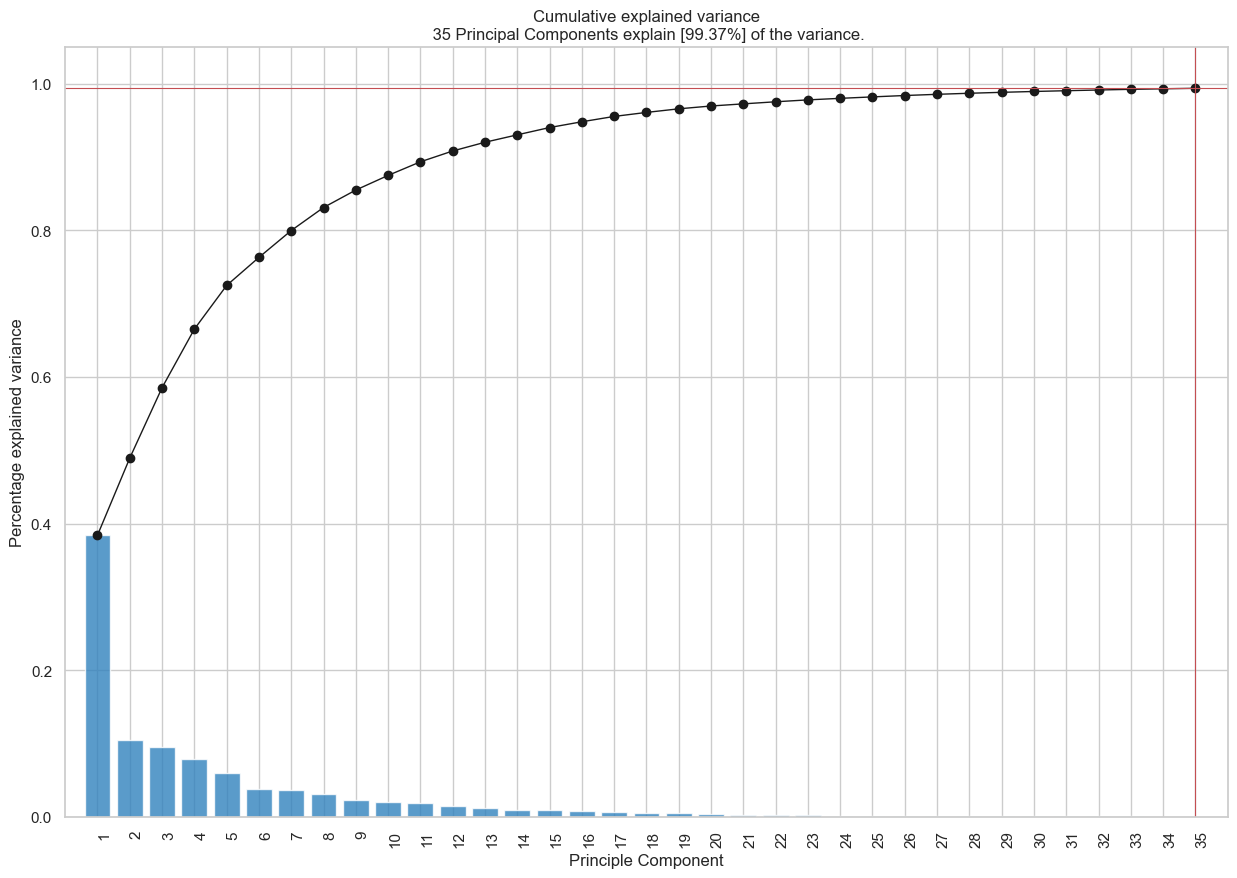

In [17]:
model_35.plot(figsize =(15,10))

[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


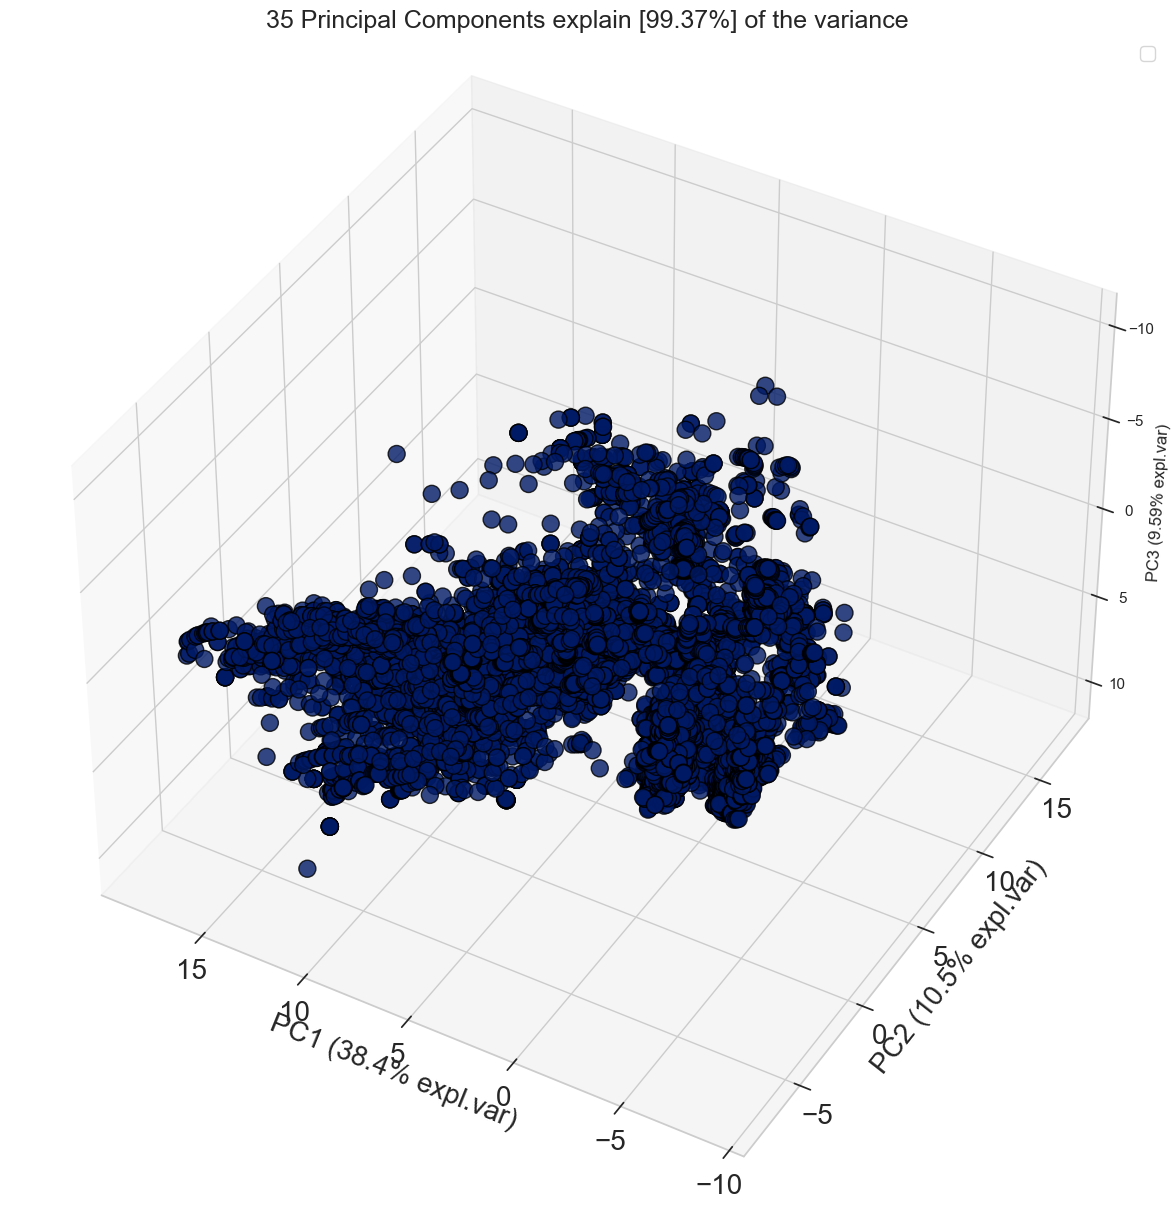

In [18]:
fig, ax = model_35.scatter3d()

In [70]:
# Initialize to reduce the data up to the nubmer of componentes that explains 99% of the variance.
#model = pca(n_components=0.95)
# Reduce the data towards 3 PCs
model_22 = pca(n_components=22, normalize = True)
result_22 = model_22.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [80] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[22]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [71]:
loadings_22= result_22['loadings']
loadings_22

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
PC1,0.053370,0.101469,0.085236,0.122594,-0.146755,-0.157651,-0.125380,0.089899,-0.099291,-0.114058,...,0.141860,0.146705,0.143251,0.148783,-0.159466,-0.157062,-0.025672,0.109810,-0.007875,0.004165
PC2,-0.227928,-0.196237,-0.221384,-0.181844,-0.119374,-0.081224,-0.072602,-0.112474,-0.058538,-0.046694,...,-0.015937,0.008642,-0.025679,0.003234,-0.087103,-0.075004,0.036087,-0.004715,0.044285,0.042409
PC3,-0.027618,-0.072060,0.007051,-0.043108,-0.069907,-0.057475,-0.115805,-0.060664,-0.125937,-0.109987,...,-0.123101,-0.125516,-0.099028,-0.108278,-0.079429,-0.112525,-0.225832,-0.044911,-0.209248,-0.230942
PC4,0.178964,0.143159,0.148135,0.105847,-0.064715,-0.050885,0.064216,0.110435,0.091731,0.109043,...,0.103394,0.102755,0.097039,0.101821,-0.058105,-0.052720,0.014370,0.063543,0.031386,0.013371
PC5,0.034750,-0.029095,-0.004879,-0.044887,-0.000998,0.002714,0.090907,0.042928,0.111753,0.071622,...,-0.024208,-0.030395,-0.004786,-0.012979,0.032504,-0.016907,-0.137612,0.061481,-0.121060,-0.164271
PC6,-0.059274,0.070491,-0.082795,0.047190,-0.118487,-0.073609,0.035180,0.017293,0.054176,0.057770,...,-0.074652,-0.087314,-0.067842,-0.089134,-0.072241,0.052962,-0.086772,-0.219621,-0.084933,-0.027972
PC7,0.068673,-0.012865,-0.032695,-0.083822,-0.144398,-0.066537,0.212361,0.038337,0.266631,0.247431,...,-0.042256,-0.061056,-0.051714,-0.067690,-0.076229,-0.049719,0.042940,-0.055463,0.057914,0.053470
PC8,-0.130394,-0.006686,-0.122075,0.002466,0.038902,-0.114716,-0.013111,0.286226,-0.013328,-0.053840,...,-0.108064,-0.026246,-0.148441,-0.049120,0.017131,-0.103914,0.264502,0.308258,0.283132,0.207501
PC9,-0.061047,-0.125891,-0.041185,-0.100535,-0.051479,0.047663,-0.031277,-0.252163,-0.032166,-0.021536,...,0.037590,0.010040,-0.007009,-0.018350,-0.107864,-0.032061,0.291171,-0.093001,0.324826,0.296479
PC10,0.104967,0.074699,0.060829,0.051284,-0.081637,0.007162,0.052426,-0.087548,0.089492,0.084201,...,-0.049359,-0.007692,-0.068750,-0.022011,-0.077411,0.009121,0.102961,-0.094513,0.126456,0.134919


In [73]:
scores_22 = result_22['PC']
scores_22['critical_temp']= data['critical_temp'].values
scores_22 = scores_22.reset_index(drop=True)
scores_22

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,critical_temp
0,-3.725198,0.673088,3.021551,1.752208,0.245684,-0.246756,0.424016,-0.217874,-0.400567,0.213369,...,0.011938,-0.225486,0.720846,0.269271,-0.225963,-0.141321,-0.327591,-0.261209,-0.205656,29.00
1,-4.502547,-0.381233,1.666412,1.134388,0.978487,-0.976002,-0.338551,0.221656,0.407095,-1.121419,...,-0.021970,-0.794628,1.220747,1.000843,-0.447529,0.394625,0.003506,-0.050783,0.405481,26.00
2,-3.547279,0.732496,3.113804,1.856136,0.295273,-0.251790,0.463819,0.010845,-0.510629,0.176818,...,0.009820,-0.255789,0.755785,0.311930,-0.140072,-0.120105,-0.346543,-0.264174,-0.067157,19.00
3,-3.641222,0.699709,3.063986,1.802170,0.269820,-0.250232,0.442177,-0.107328,-0.454430,0.194415,...,0.010799,-0.240086,0.738463,0.288985,-0.184569,-0.131769,-0.336311,-0.262553,-0.141378,22.00
4,-3.871798,0.632704,2.952901,1.661103,0.199854,-0.235467,0.395156,-0.422837,-0.297639,0.253740,...,0.014586,-0.199168,0.685170,0.236290,-0.301461,-0.156346,-0.312791,-0.258934,-0.312421,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21188,2.408783,-0.212277,-1.393485,-2.446617,2.912397,-1.792461,-0.094385,-1.018681,-0.226881,1.199733,...,0.356257,1.317870,-1.596229,0.335288,0.696795,-0.014391,-0.081083,0.278011,-0.838526,2.44
21189,-5.400238,-0.923353,1.236743,-0.310368,1.145621,0.112421,0.980301,-0.775298,0.337085,-0.821135,...,0.194512,0.049491,-0.455290,0.087604,-0.717661,0.027608,0.221800,0.025083,0.066126,122.10
21190,10.407867,-0.972395,1.570774,-0.315944,-0.235005,-1.199269,-0.912271,0.061791,-0.727201,-0.361774,...,0.892926,-0.316069,-0.024914,0.710461,-0.595029,-0.032314,0.944150,0.606524,-0.415992,1.98
21191,9.693212,-1.022613,1.199889,-0.842030,-0.971780,-0.612568,-0.819690,-1.616050,0.140556,-0.066145,...,1.037592,-0.531095,0.019905,0.578451,-0.722520,-0.034389,0.720779,0.673634,-0.189575,1.84


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 22 Principal Components explain [97.53%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

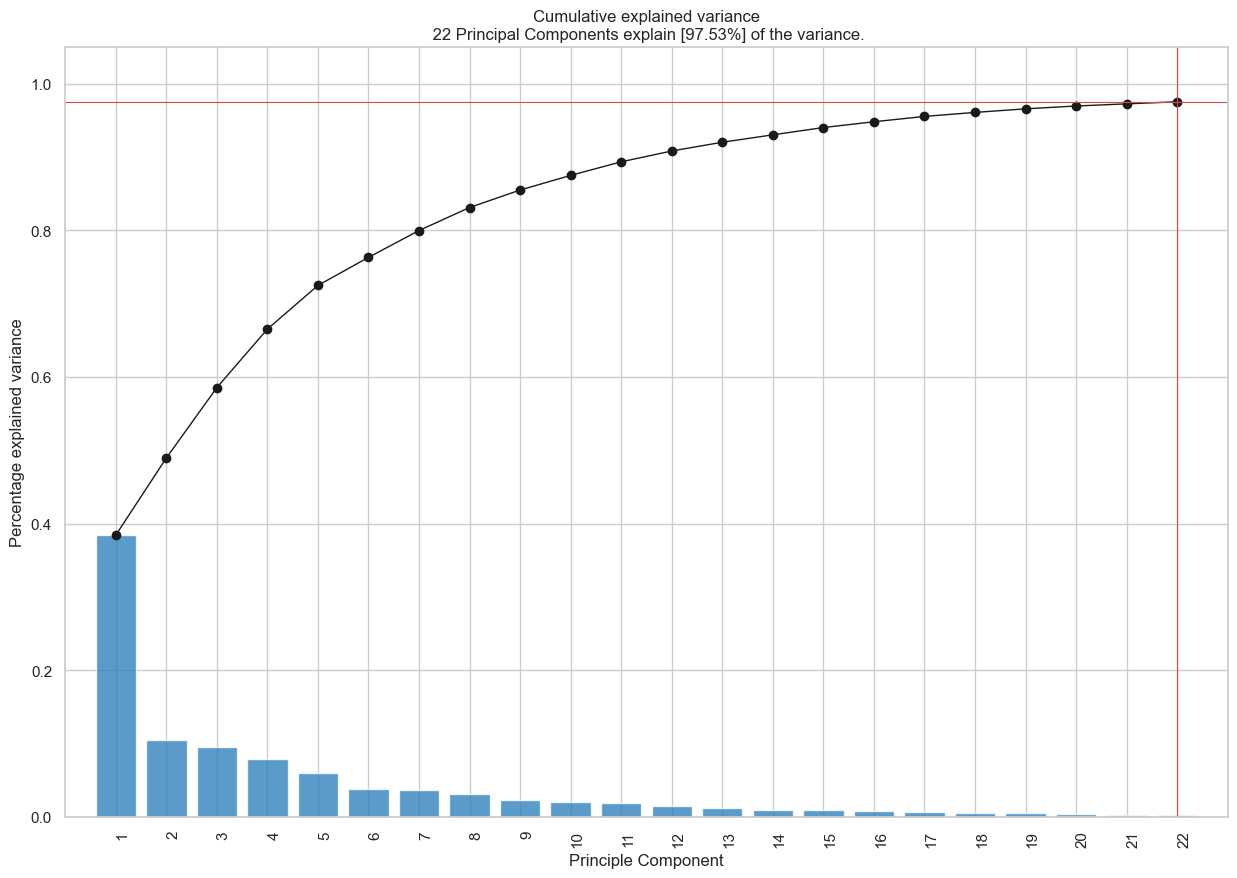

In [45]:
model_22.plot(figsize =(15,10))

[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


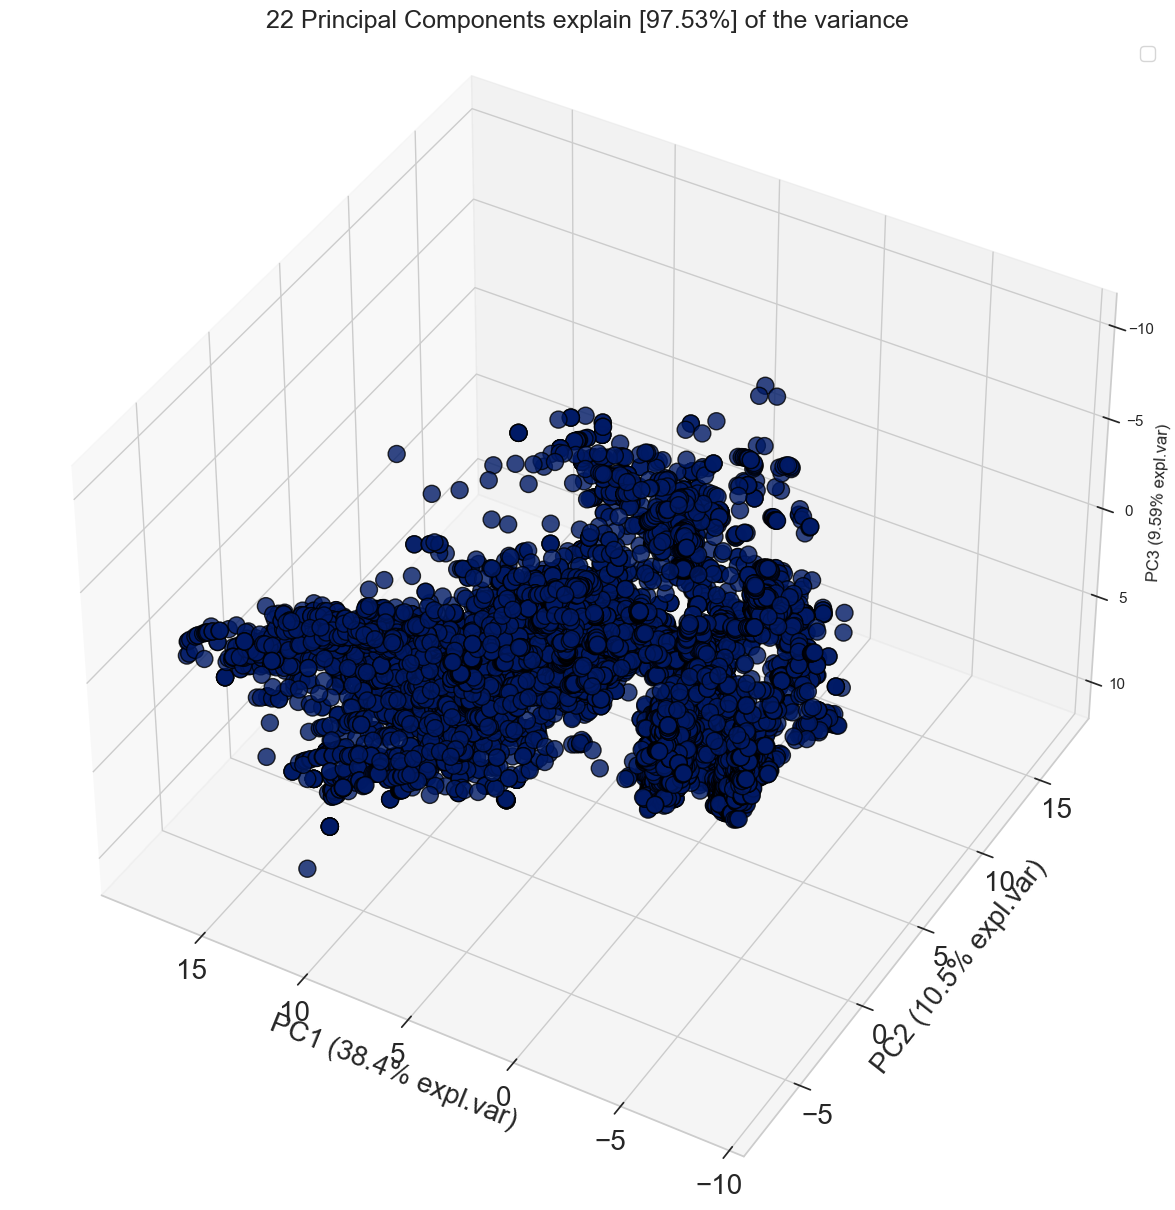

In [46]:
fig, ax = model_22.scatter3d()

In [24]:
from h2o.automl import H2OAutoML

# Initialize H2O
#h2o.init()

In [25]:
# Initialize H2O
h2o.init()
h2o.shutdown()


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,29 mins 47 secs
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.1
H2O_cluster_version_age:,27 days
H2O_cluster_name:,H2O_from_python_Misi_9jwc29
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.047 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


C:\Users\Misi\AppData\Local\Temp\ipykernel_17520\1458043292.py:3: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()


H2O session _sid_a4df closed.


# CROSS-VALIDATION AND PC

In [25]:
def cv_results(df):
    # Step 1: Data Preprocessing
    X = df.drop(columns=['critical_temp'])
    y = df['critical_temp']

    scaler = StandardScaler(with_mean=True, with_std=True)
    X = scaler.fit_transform(X)

    # Step 2: PCA (using the 'PCA' library)
    # Step 2: PCA (using the 'pca' library)
    n_values = [40, 50,60,70,80,90]
    pca_results = {}  # Dictionary to store PCA results

    for n in n_values:
        pca_model = pca(n_components=n, normalize=True)  # Using the 'pca' library
        result_n = pca_model.fit_transform(X)
       
        #print(result_n)
        # Display the PCA result for n
        #print(f"PCA result for n={n}:")
        #print(result_n['PC'])
        #print(type(result_n['PC']))
        pca_df = result_n['PC']
        pca_df['critical_temp'] = y.values
        pca_df = pca_df.reset_index(drop=True)
        # Storing the PCA dataframe in the dictionary
        pca_results[f"PCA{n}"] = pca_df

        #print(pca_results)        
        #print(type(pca_results))
        
     # Step 3: Cross-validation and print results for each PCA dataframe
    for n, pca_df in pca_results.items():
        print(f"Cross-validation result for {n}:")
        X = pca_df.drop(columns=['critical_temp'])
        y = pca_df['critical_temp']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        y_train_sc = scaler.fit_transform(y_train.values.reshape(-1, 1))
        list_of_models = [        
            RandomForestRegressor(),
            XGBRegressor(),
            KNeighborsRegressor(),
            LGBMRegressor(),
            SVR(),
            CatBoostRegressor()
        ]      

        list_of_model_names = [type(x).__name__ for x in list_of_models]
        cv_results = pd.DataFrame(
            data=0.0,
            index=list_of_model_names,
            columns=['fit_time', 'score_time', 'neg_mean_squared_error']
        )
    
        # Training all models from the list
        for model in list_of_models:        
            cv_result = cross_validate(
                estimator=model,
                X=X_train,
                y=y_train_sc,
                scoring=['neg_mean_squared_error'],
                cv=30,
                n_jobs=-1
            )

            cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))

        print(cv_results)

    return cv_results

In [26]:
cv_results(df)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [80] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[40]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [80] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[50]
[pca] >Multiple test correction applied for 

,fit_time,score_time,neg_mean_squared_error
RandomForestRegressor,515.650545,0.031656,-0.086339
XGBRegressor,37.374169,0.006551,-0.092895
KNeighborsRegressor,0.033634,0.126502,-0.101483
LGBMRegressor,2.413553,0.006886,-0.103231
SVR,40.088916,1.146158,-0.165775
CatBoostRegressor,69.532373,0.017603,-0.090621


In [76]:
def cv_results(df):
    # Step 1: Data Preprocessing
    X = df.drop(columns=['critical_temp'])
    y = df['critical_temp']

    scaler = StandardScaler(with_mean=True, with_std=True)
    X = scaler.fit_transform(X)

    # Step 2: PCA (using the 'PCA' library)
    # Step 2: PCA (using the 'pca' library)
    n_values = [50]
    pca_results = {}  # Dictionary to store PCA results

    for n in n_values:
        pca_model = pca(n_components=n, normalize=True)  # Using the 'pca' library
        result_n = pca_model.fit_transform(X)
       
        #print(result_n)
        # Display the PCA result for n
        #print(f"PCA result for n={n}:")
        #print(result_n['PC'])
        #print(type(result_n['PC']))
        pca_df = result_n['PC']
        pca_df['critical_temp'] = y.values
        pca_df = pca_df.reset_index(drop=True)
        # Storing the PCA dataframe in the dictionary
        pca_results[f"PCA{n}"] = pca_df
       # Printing the PCA results for n=50 and n=90
   

    # Other steps or return statement (if any) can be added here

    return pca_results

In [77]:
df_50 =cv_results(df)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [80] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[50]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [78]:
df_50

{'PCA50':              PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
 0      -3.743386  0.671760  3.010733  1.770929  0.241249 -0.242314  0.428352   
 1      -4.521007 -0.380771  1.658844  1.144624  0.975353 -0.981376 -0.320455   
 2      -3.565665  0.731439  3.102370  1.875407  0.290381 -0.247928  0.468570   
 3      -3.659504  0.698511  3.052878  1.821137  0.265167 -0.246088  0.446728   
 4      -3.889817  0.631144  2.942587  1.679454  0.195817 -0.230389  0.399022   
 ...          ...       ...       ...       ...       ...       ...       ...   
 21258   2.382196 -0.201393 -1.379315 -2.444167  2.916304 -1.786251 -0.062147   
 21259  -5.417423 -0.921482  1.238562 -0.302105  1.148532  0.131898  0.979214   
 21260  10.377054 -0.965677  1.573432 -0.307629 -0.223119 -1.210197 -0.894571   
 21261   9.663849 -1.020655  1.204689 -0.834592 -0.957913 -0.612652 -0.814504   
 21262   3.836822  1.549743 -1.862633  2.634036 -4.124175  0.329538 -2.942464   
 
             PC8 

In [79]:
pc_50 = df_50['PCA50']
pc_50

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,critical_temp
0,-3.743386,0.671760,3.010733,1.770929,0.241249,-0.242314,0.428352,-0.220680,-0.395996,0.200789,...,0.127397,0.099453,0.182961,-0.035693,0.012846,0.040641,-0.002513,-0.016284,0.099678,29.00
1,-4.521007,-0.380771,1.658844,1.144624,0.975353,-0.981376,-0.320455,0.221059,0.420853,-1.139054,...,0.302492,0.162853,0.214852,-0.082199,-0.082932,0.137431,-0.019249,0.269939,0.177263,26.00
2,-3.565665,0.731439,3.102370,1.875407,0.290381,-0.247928,0.468570,0.007895,-0.505631,0.162414,...,0.159839,0.090534,0.160062,-0.034852,0.011948,0.040377,-0.001708,-0.043404,0.125749,19.00
3,-3.659504,0.698511,3.052878,1.821137,0.265167,-0.246088,0.446728,-0.110198,-0.449640,0.180938,...,0.142996,0.095578,0.172437,-0.035209,0.011991,0.040279,-0.002905,-0.028861,0.112637,22.00
4,-3.889817,0.631144,2.942587,1.679454,0.195817,-0.230389,0.399022,-0.425540,-0.293521,0.242890,...,0.098921,0.104707,0.200084,-0.036785,0.015821,0.042338,0.002363,0.004426,0.073737,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,2.382196,-0.201393,-1.379315,-2.444167,2.916304,-1.786251,-0.062147,-1.023988,-0.227408,1.209590,...,0.025001,0.044546,0.123065,-0.038984,0.346589,0.104688,-0.230899,0.070014,0.096371,2.44
21259,-5.417423,-0.921482,1.238562,-0.302105,1.148532,0.131898,0.979214,-0.779413,0.335419,-0.805887,...,-0.001717,-0.088966,-0.039251,0.021886,-0.045767,0.018406,0.012431,0.098024,0.005232,122.10
21260,10.377054,-0.965677,1.573432,-0.307629,-0.223119,-1.210197,-0.894571,0.059218,-0.719193,-0.368823,...,0.074260,-0.018954,-0.014849,-0.038862,0.075620,0.004143,-0.062418,-0.015802,-0.007690,1.98
21261,9.663849,-1.020655,1.204689,-0.834592,-0.957913,-0.612652,-0.814504,-1.615880,0.146727,-0.066625,...,0.087234,-0.121833,-0.051264,-0.130827,0.117119,0.000333,-0.019777,-0.007180,0.050462,1.84


In [80]:
# Assign features and target variables
X = pc_50.drop(columns=['critical_temp'])
y = pc_50['critical_temp']

In [81]:
scaler = StandardScaler(with_mean=True, with_std=True)
X = scaler.fit_transform(X)

In [82]:
y = scaler.fit_transform(y.values.reshape(-1, 1))

y

array([[-0.15826733],
       [-0.24584948],
       [-0.45020782],
       ...,
       [-0.94709052],
       [-0.95117769],
       [-0.63121092]])

In [89]:
RandomForest_LABEL = 'RF'
CATBOOST_LABEL = 'CatBoost'
LGBM_LABEL = 'LGBM'
XGB_LABEL = 'XGB'

def unpack_dict(dict_):
    result = dict()
    for k, v in dict_.items():
        if isinstance(v, dict):
            result = {**result, **unpack_dict(v)}
        else:
            result[k] = v
    return result

def round_floats(object_, ndigits=5):
    if isinstance(object_, float):
        return round(object_, ndigits)
    if isinstance(object_, dict):
        return {k: round_floats(v) for k, v in object_.items()}
    if isinstance(object_, (list, tuple)):
        return [round_floats(x) for x in object_]
    return object_

def pretty_print_dict(dict_, sort_keys=True, indent=4, ndigits=None) -> str:
    if ndigits is not None:
        dict_ = round_floats(dict_, ndigits)
    return json.dumps(dict_, sort_keys=sort_keys, indent=indent)

def base_model(model_type, random_state, n_jobs):
    if model_type == CATBOOST_LABEL:
        return CatBoostRegressor(random_state=random_state)
    elif model_type == LGBM_LABEL:
        return LGBMRegressor(random_state=random_state, n_jobs=n_jobs)
    elif model_type == XGB_LABEL:
        return XGBRegressor(random_state=random_state, n_jobs=n_jobs)
    elif model_type == RandomForest_LABEL:
        return RandomForestRegressor(random_state=random_state, n_jobs=n_jobs)
    else:
        raise ValueError(f'Unknown model_type: {model_type}')

def shuffle_split(X, test_size, random_state):
    n_train, n_test = _validate_shuffle_split(X.shape[0], test_size=test_size, train_size=None)
    splitter = ShuffleSplit(test_size=n_test, train_size=n_train, random_state=random_state)
    train_index, test_index = next(splitter.split(X=X))
    return train_index, test_index

def search_space(model_type):
    if model_type == LGBM_LABEL:
        return {
            'boosting_type': hp.choice('LGBM_boosting_type', ['gbdt']),
            'max_depth': ho_scope.int(hp.quniform('LGBM_max_depth', 3, 7, 1)),
            'min_data_in_leaf': ho_scope.int(hp.quniform('LGBM_min_data_in_leaf', 2, 30, 1)),
            'learning_rate': hp.loguniform('LGBM_learning_rate', np.log(0.01), np.log(0.3)),
            'n_estimators': ho_scope.int(hp.quniform('LGBM_n_estimators', 50, 1000, 10)),
            'max_bin': ho_scope.int(hp.quniform('LGBM_max_bin', 200, 300, 5)),
            'lambda_l1': hp.loguniform('LGBM_lambda_l1', np.log(1e-8), 10.0),
            'lambda_l2': hp.loguniform('LGBM_lambda_l2', np.log(1e-8), 10.0),
            'min_gain_to_split': hp.uniform('LGBM_min_gain_to_split', 0.0, 15.0),
            'bagging_freq': hp.choice('LGBM_bagging_freq', [1]),
            'bagging_fraction': hp.quniform('LGBM_bagging_fraction', 0.5, 0.95, 0.05),
        }
    elif model_type == CATBOOST_LABEL:
        return {
            'max_depth': ho_scope.int(hp.quniform('CatBoost_max_depth', 3, 7, 1)),
            'min_data_in_leaf': ho_scope.int(hp.quniform('CatBoost_min_data_in_leaf', 2, 30, 1)),
            'learning_rate': hp.loguniform('CatBoost_learning_rate', np.log(0.01), np.log(0.3)),
            'n_estimators': ho_scope.int(hp.quniform('CatBoost_n_estimators', 50, 1000, 10)),
            'l2_leaf_reg': hp.loguniform('CatBoost_l2_leaf_reg', np.log(1e-8), 10.0),
        }
    elif model_type == XGB_LABEL:
        return {
            'max_depth': ho_scope.int(hp.quniform('XGB_max_depth', 3, 7, 1)),
            'learning_rate': hp.loguniform('XGB_learning_rate', np.log(0.01), np.log(0.3)),
            'n_estimators': ho_scope.int(hp.quniform('XGB_n_estimators', 50, 1000, 10)),
            'reg_alpha': hp.loguniform('XGB_l2_reg_alpha', np.log(1e-8), 10.0),
            'reg_lambda': hp.loguniform('XGB_l2_reg_lambda', np.log(1e-8), 10.0),
        }
    elif model_type == RandomForest_LABEL:
        return {
            'n_estimators': ho_scope.int(hp.quniform('RF_n_estimators', 50, 1000, 10)),
            'max_depth': ho_scope.int(hp.quniform('RF_max_depth', 3, 20, 1)),
            'min_samples_split': hp.uniform('RF_min_samples_split', 0.1, 1.0),
            'min_samples_leaf': hp.uniform('RF_min_samples_leaf', 0.1, 0.5),
            'max_features': hp.choice('RF_max_features', ['sqrt', 'log2', None]),
        }
    else:
        raise ValueError(f'Unknown model_type: {model_type}')

def evaluate_scores(estimator, X, y, train_index, test_index):
    result = dict()
    prediction = {
        'train': estimator.predict(X[train_index]),
        'test': estimator.predict(X[test_index])
    }

    scoring_functions = {
        'R-squared': r2,
        'MAE': mae,
        'MAPE': mape
    }

    for set_name, y_true in (('train', y[train_index]), ('test', y[test_index])):
        result[set_name] = dict()
        for scoring_label, scoring_function in scoring_functions.items():
            score = scoring_function(y_true, prediction[set_name])
            result[set_name][scoring_label] = score

    return result

In [90]:
class Regressor:
    
    def __init__(
        self,
        n_folds = 5,
        max_iter = 1000,
        n_jobs = 4,
        seed = 1,
        valid_size = 0.2,
        skip = True
    ):
        self.n_folds = n_folds
        self.max_iter = max_iter
        self.n_jobs = n_jobs
        self.seed = seed
        self.valid_size = valid_size
        self.skip = skip

    def _construct_estimator(self, model_type, params_nested):
        model = base_model(model_type, random_state=self.seed, n_jobs=self.n_jobs)
        model.set_params(**unpack_dict(params_nested))
        return model
    
    # Bayesian search of optimal hyperparameters (instead of using GridSearchCV)
    def optimize_hyperparams(
        self, model_type, X, y, train_index, test_index
    ):

        result = dict()

        baseline = self._construct_estimator(model_type, dict()).fit(X[train_index], y[train_index])
        result['baseline_scores'] = evaluate_scores(
            estimator=baseline,
            X=X,
            y=y,
            train_index=train_index,
            test_index=test_index
        )
        result['baseline_estimator'] = baseline
        print(
            f'{model_type}: Baseline classifier`s scores: {pretty_print_dict(result["baseline_scores"], ndigits=5)}'
        )


        def objective(params_nested):
            regressor = self._construct_estimator(model_type, params_nested)
            cv_result = cross_val_score(
                estimator=regressor,
                X=X[train_index],
                y=y[train_index],
                cv=self.n_folds,
                scoring='neg_mean_absolute_percentage_error',
                n_jobs=self.n_jobs,
            )
            return {'loss': -cv_result.mean(), 'cv_std': cv_result.std(), 'params': params_nested, 'status': STATUS_OK}
        if self.skip:
            return result
        print(f'{model_type}: Start hyperparameter optimization ...')
        bayes_trials = Trials()
        best_params = fmin(
            fn=objective,
            space=search_space(model_type),
            algo=tpe.suggest,
            max_evals=self.max_iter,
            trials=bayes_trials,
            rstate=np.random.default_rng(seed=self.seed),
        )
        best_params_nested = space_eval(search_space(model_type), best_params)
        best_params_set = unpack_dict(best_params_nested)
        print(f'{model_type}: Best hyperparams set: {pretty_print_dict(best_params_set, ndigits=5)}')
        cv_mean = -bayes_trials.best_trial['result']['loss']
        cv_std = bayes_trials.best_trial['result']['cv_std']
        print(f'Cross-validation score: {round(cv_mean, 5)} +/- {round(cv_std, 5)}')

        best_estimator = self._construct_estimator(model_type, best_params_nested).fit(X[train_index], y[train_index])
        result['best_scores'] = evaluate_scores(
            estimator=best_estimator,
            X=X,
            y=y,
            train_index=train_index,
            test_index=test_index
        )
#         result['cv_mean'] = cv_mean
#         result['cv_std'] = cv_std
        print(
            f'{model_type} scores: '
            + f'{pretty_print_dict(result["best_scores"], ndigits=5)}'
        )
        result['best_estimator'] = best_estimator
        
        return result
    
    def fit(self, X, y, model_type):
        train_index, test_index = shuffle_split(X, self.valid_size, self.seed)
        print('Start hyperparameter optimization ...')
        return self.optimize_hyperparams(model_type, X, y, train_index, test_index)
        

In [95]:
baseline_model_type = 'RF'
regressor = Regressor(seed=1, valid_size=0.2, skip=False, max_iter=100)
result = regressor.fit(X, y, baseline_model_type)

# Access the baseline estimator and print its default parameters
baseline_estimator = result['baseline_estimator']
print("Baseline Model Default Parameters:")
print(baseline_estimator.get_params())

# Access the best estimator and print its default parameters
best_estimator = result['best_estimator']
print("Best Estimator Default Parameters:")
print(best_estimator.get_params())
#cb_model_100 = regressor.fit(X, y, 'CatBoost') # SOTA

rf_model_100 = regressor.fit(X, y, 'RF') 
#xgb_model_100 = regressor.fit(X, y, 'XGB')

Start hyperparameter optimization ...


C:\Users\Misi\anaconda3\envs\superconductivity\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RF: Baseline classifier`s scores: {
    "test": {
        "MAE": 0.16406,
        "MAPE": 0.76831,
        "R-squared": 0.91796
    },
    "train": {
        "MAE": 0.08119,
        "MAPE": 0.41442,
        "R-squared": 0.97664
    }
}
RF: Start hyperparameter optimization ...
100%|██████████| 100/100 [03:32<00:00,  2.12s/trial, best loss: 1.0009073126631278]
RF: Best hyperparams set: {
    "max_depth": 16,
    "max_features": null,
    "min_samples_leaf": 0.21911,
    "min_samples_split": 0.94455,
    "n_estimators": 90
}
Cross-validation score: -1.00091 +/- 0.00147
RF scores: {
    "test": {
        "MAE": 0.85115,
        "MAPE": 0.99982,
        "R-squared": -3e-05
    },
    "train": {
        "MAE": 0.8574,
        "MAPE": 0.99945,
        "R-squared": -0.0
    }
}
Baseline Model Default Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 

C:\Users\Misi\anaconda3\envs\superconductivity\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Misi\anaconda3\envs\superconductivity\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RF: Baseline classifier`s scores: {
    "test": {
        "MAE": 0.16406,
        "MAPE": 0.76831,
        "R-squared": 0.91796
    },
    "train": {
        "MAE": 0.08119,
        "MAPE": 0.41442,
        "R-squared": 0.97664
    }
}
RF: Start hyperparameter optimization ...
100%|██████████| 100/100 [03:33<00:00,  2.13s/trial, best loss: 1.0009073126631278]
RF: Best hyperparams set: {
    "max_depth": 16,
    "max_features": null,
    "min_samples_leaf": 0.21911,
    "min_samples_split": 0.94455,
    "n_estimators": 90
}
Cross-validation score: -1.00091 +/- 0.00147
RF scores: {
    "test": {
        "MAE": 0.85115,
        "MAPE": 0.99982,
        "R-squared": -3e-05
    },
    "train": {
        "MAE": 0.8574,
        "MAPE": 0.99945,
        "R-squared": -0.0
    }
}


C:\Users\Misi\anaconda3\envs\superconductivity\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

Baseline Model Default Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': 4, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Best Estimator Default Parameters:

In [97]:
regr_baseline = RandomForestRegressor(max_depth=None, min_samples_leaf=1,min_samples_split= 2, n_estimators=100,max_features =1,
                                      n_jobs=4,random_state=1, max_leaf_nodes =None,max_samples=None, verbose =0)
regr_baseline.fit(X_train, y_train)

C:\Users\Misi\anaconda3\envs\superconductivity\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_features=1, n_jobs=4, random_state=1)

In [98]:
y_pred=regr_baseline.predict(X_test)
y_pred

array([-0.67676796,  1.46027405, -0.20235035, ..., -0.71071099,
       -0.70491178, -0.67133969])

In [108]:
mae = mae(y_test, y_pred)
print('MAE: %.4f' % mae)

TypeError: 'numpy.float64' object is not callable

In [100]:
mape = mape(y_test, y_pred)
mape

0.7939383307707735

In [101]:
r2_result = r2(y_test, y_pred)
r2_result

0.8974205727449865

Best Estimator Default Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 16, 'max_features': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 0.2191128988772164, 'min_samples_split': 0.9445506895083761, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 90, 'n_jobs': 4, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}

In [106]:
regr_best_est_default = RandomForestRegressor(max_depth=16, min_samples_leaf= 0.2191128988772164,min_samples_split= 0.9445506895083761, n_estimators=90,max_features =None,
                                      n_jobs=4,random_state=1, max_leaf_nodes =None,max_samples=None, verbose =0, warm_start= False)
regr_best_est_default.fit(X_train, y_train)

C:\Users\Misi\anaconda3\envs\superconductivity\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=16, max_features=None,
                      min_samples_leaf=0.2191128988772164,
                      min_samples_split=0.9445506895083761, n_estimators=90,
                      n_jobs=4, random_state=1)

In [107]:
y_pred_def=regr_best_est_default.predict(X_test)
y_pred_def

array([0.00341311, 0.00341311, 0.00341311, ..., 0.00341311, 0.00341311,
       0.00341311])

# PC_90 and catboost

In [8]:
def cv_results(df):
    # Step 1: Data Preprocessing
    X = df.drop(columns=['critical_temp'])
    y = df['critical_temp']

    scaler = StandardScaler(with_mean=True, with_std=True)
    X = scaler.fit_transform(X)

    # Step 2: PCA (using the 'PCA' library)
    # Step 2: PCA (using the 'pca' library)
    n_values = [90]
    pca_results = {}  # Dictionary to store PCA results

    for n in n_values:
        pca_model = pca(n_components=n, normalize=True)  # Using the 'pca' library
        result_n = pca_model.fit_transform(X)
       
        #print(result_n)
        # Display the PCA result for n
        #print(f"PCA result for n={n}:")
        #print(result_n['PC'])
        #print(type(result_n['PC']))
        pca_df = result_n['PC']
        pca_df['critical_temp'] = y.values
        pca_df = pca_df.reset_index(drop=True)
        # Storing the PCA dataframe in the dictionary
        pca_results[f"PCA{n}"] = pca_df
       # Printing the PCA results for n=50 and n=90
   

    # Other steps or return statement (if any) can be added here

    return pca_results

In [9]:
df_90 =cv_results(df)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >[WARNING]: >Number of components can not be more then number of features. n_components is set to 79
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [80] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[79]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [10]:
pc_90 = df_90['PCA90']
X_90 = pc_90.drop(columns=['critical_temp'])
y_90 = pc_90['critical_temp']

In [11]:
scaler = StandardScaler(with_mean=True, with_std=True)
X = scaler.fit_transform(X_90)
y = scaler.fit_transform(y_90.values.reshape(-1, 1))



In [14]:
regressor = Regressor(
    seed=1, valid_size=0.2, skip=False, max_iter=100
)
cb_model_100 = regressor.fit(X, y, 'CatBoost') # SOTA

#rf_model_1000 = regressor.fit(X, y, 'RF') 
#xgb_model_100 = regressor.fit(X, y, 'XGB')

Start hyperparameter optimization ...
Learning rate set to 0.064066
0:	learn: 0.9594300	total: 174ms	remaining: 2m 54s
1:	learn: 0.9205034	total: 196ms	remaining: 1m 37s
2:	learn: 0.8842175	total: 217ms	remaining: 1m 12s
3:	learn: 0.8492603	total: 238ms	remaining: 59.3s
4:	learn: 0.8193410	total: 258ms	remaining: 51.3s
5:	learn: 0.7910708	total: 278ms	remaining: 46s
6:	learn: 0.7637516	total: 299ms	remaining: 42.3s
7:	learn: 0.7396799	total: 319ms	remaining: 39.5s
8:	learn: 0.7171414	total: 338ms	remaining: 37.2s
9:	learn: 0.6965416	total: 358ms	remaining: 35.4s
10:	learn: 0.6775923	total: 378ms	remaining: 34s
11:	learn: 0.6590734	total: 400ms	remaining: 32.9s
12:	learn: 0.6431076	total: 421ms	remaining: 32s
13:	learn: 0.6269651	total: 441ms	remaining: 31.1s
14:	learn: 0.6119962	total: 461ms	remaining: 30.3s
15:	learn: 0.5990190	total: 481ms	remaining: 29.6s
16:	learn: 0.5869370	total: 501ms	remaining: 29s
17:	learn: 0.5756265	total: 521ms	remaining: 28.4s
18:	learn: 0.5652637	total: 5

160:	learn: 0.3555871	total: 3.41s	remaining: 17.8s
161:	learn: 0.3548079	total: 3.44s	remaining: 17.8s
162:	learn: 0.3541975	total: 3.46s	remaining: 17.8s
163:	learn: 0.3537503	total: 3.48s	remaining: 17.7s
164:	learn: 0.3534380	total: 3.5s	remaining: 17.7s
165:	learn: 0.3530853	total: 3.52s	remaining: 17.7s
166:	learn: 0.3527465	total: 3.53s	remaining: 17.6s
167:	learn: 0.3525482	total: 3.55s	remaining: 17.6s
168:	learn: 0.3519272	total: 3.57s	remaining: 17.6s
169:	learn: 0.3515921	total: 3.59s	remaining: 17.5s
170:	learn: 0.3508825	total: 3.61s	remaining: 17.5s
171:	learn: 0.3505331	total: 3.63s	remaining: 17.5s
172:	learn: 0.3499798	total: 3.65s	remaining: 17.5s
173:	learn: 0.3496768	total: 3.67s	remaining: 17.4s
174:	learn: 0.3490560	total: 3.69s	remaining: 17.4s
175:	learn: 0.3484351	total: 3.71s	remaining: 17.4s
176:	learn: 0.3477639	total: 3.73s	remaining: 17.4s
177:	learn: 0.3475256	total: 3.75s	remaining: 17.3s
178:	learn: 0.3471560	total: 3.77s	remaining: 17.3s
179:	learn: 0

326:	learn: 0.3019554	total: 6.61s	remaining: 13.6s
327:	learn: 0.3018259	total: 6.63s	remaining: 13.6s
328:	learn: 0.3015196	total: 6.65s	remaining: 13.6s
329:	learn: 0.3012883	total: 6.67s	remaining: 13.5s
330:	learn: 0.3010069	total: 6.69s	remaining: 13.5s
331:	learn: 0.3007927	total: 6.71s	remaining: 13.5s
332:	learn: 0.3007280	total: 6.72s	remaining: 13.5s
333:	learn: 0.3004952	total: 6.74s	remaining: 13.4s
334:	learn: 0.3002375	total: 6.76s	remaining: 13.4s
335:	learn: 0.3001369	total: 6.78s	remaining: 13.4s
336:	learn: 0.2998902	total: 6.8s	remaining: 13.4s
337:	learn: 0.2997275	total: 6.82s	remaining: 13.4s
338:	learn: 0.2996614	total: 6.84s	remaining: 13.3s
339:	learn: 0.2994488	total: 6.86s	remaining: 13.3s
340:	learn: 0.2992356	total: 6.88s	remaining: 13.3s
341:	learn: 0.2990875	total: 6.9s	remaining: 13.3s
342:	learn: 0.2988641	total: 6.92s	remaining: 13.2s
343:	learn: 0.2987760	total: 6.93s	remaining: 13.2s
344:	learn: 0.2984800	total: 6.95s	remaining: 13.2s
345:	learn: 0.

486:	learn: 0.2725648	total: 9.63s	remaining: 10.1s
487:	learn: 0.2723408	total: 9.65s	remaining: 10.1s
488:	learn: 0.2721839	total: 9.66s	remaining: 10.1s
489:	learn: 0.2720383	total: 9.68s	remaining: 10.1s
490:	learn: 0.2718336	total: 9.7s	remaining: 10.1s
491:	learn: 0.2717524	total: 9.72s	remaining: 10s
492:	learn: 0.2716213	total: 9.74s	remaining: 10s
493:	learn: 0.2714544	total: 9.76s	remaining: 9.99s
494:	learn: 0.2712776	total: 9.78s	remaining: 9.97s
495:	learn: 0.2709942	total: 9.79s	remaining: 9.95s
496:	learn: 0.2708555	total: 9.81s	remaining: 9.93s
497:	learn: 0.2707120	total: 9.83s	remaining: 9.91s
498:	learn: 0.2706179	total: 9.85s	remaining: 9.89s
499:	learn: 0.2705312	total: 9.87s	remaining: 9.87s
500:	learn: 0.2703720	total: 9.89s	remaining: 9.85s
501:	learn: 0.2702016	total: 9.91s	remaining: 9.83s
502:	learn: 0.2701038	total: 9.92s	remaining: 9.8s
503:	learn: 0.2699483	total: 9.94s	remaining: 9.79s
504:	learn: 0.2697192	total: 9.96s	remaining: 9.76s
505:	learn: 0.2695

645:	learn: 0.2528849	total: 12.6s	remaining: 6.91s
646:	learn: 0.2528269	total: 12.6s	remaining: 6.89s
647:	learn: 0.2526593	total: 12.6s	remaining: 6.87s
648:	learn: 0.2525933	total: 12.7s	remaining: 6.85s
649:	learn: 0.2524863	total: 12.7s	remaining: 6.83s
650:	learn: 0.2523382	total: 12.7s	remaining: 6.81s
651:	learn: 0.2522043	total: 12.7s	remaining: 6.79s
652:	learn: 0.2520507	total: 12.7s	remaining: 6.77s
653:	learn: 0.2519380	total: 12.8s	remaining: 6.75s
654:	learn: 0.2518142	total: 12.8s	remaining: 6.74s
655:	learn: 0.2516823	total: 12.8s	remaining: 6.72s
656:	learn: 0.2515549	total: 12.8s	remaining: 6.7s
657:	learn: 0.2514911	total: 12.8s	remaining: 6.68s
658:	learn: 0.2513412	total: 12.9s	remaining: 6.66s
659:	learn: 0.2512078	total: 12.9s	remaining: 6.64s
660:	learn: 0.2510878	total: 12.9s	remaining: 6.62s
661:	learn: 0.2509745	total: 12.9s	remaining: 6.6s
662:	learn: 0.2508459	total: 12.9s	remaining: 6.58s
663:	learn: 0.2507266	total: 13s	remaining: 6.56s
664:	learn: 0.25

813:	learn: 0.2372035	total: 15.8s	remaining: 3.61s
814:	learn: 0.2370816	total: 15.8s	remaining: 3.59s
815:	learn: 0.2369670	total: 15.8s	remaining: 3.57s
816:	learn: 0.2368917	total: 15.9s	remaining: 3.55s
817:	learn: 0.2368086	total: 15.9s	remaining: 3.53s
818:	learn: 0.2367853	total: 15.9s	remaining: 3.51s
819:	learn: 0.2366666	total: 15.9s	remaining: 3.5s
820:	learn: 0.2365853	total: 15.9s	remaining: 3.48s
821:	learn: 0.2365099	total: 16s	remaining: 3.46s
822:	learn: 0.2364171	total: 16s	remaining: 3.44s
823:	learn: 0.2363354	total: 16s	remaining: 3.42s
824:	learn: 0.2362341	total: 16s	remaining: 3.4s
825:	learn: 0.2361408	total: 16s	remaining: 3.38s
826:	learn: 0.2360770	total: 16.1s	remaining: 3.36s
827:	learn: 0.2359916	total: 16.1s	remaining: 3.34s
828:	learn: 0.2359219	total: 16.1s	remaining: 3.32s
829:	learn: 0.2358789	total: 16.1s	remaining: 3.3s
830:	learn: 0.2358129	total: 16.1s	remaining: 3.28s
831:	learn: 0.2356827	total: 16.2s	remaining: 3.26s
832:	learn: 0.2356145	tot

978:	learn: 0.2255519	total: 19s	remaining: 408ms
979:	learn: 0.2254907	total: 19.1s	remaining: 389ms
980:	learn: 0.2254220	total: 19.1s	remaining: 369ms
981:	learn: 0.2253669	total: 19.1s	remaining: 350ms
982:	learn: 0.2253166	total: 19.1s	remaining: 331ms
983:	learn: 0.2252381	total: 19.1s	remaining: 311ms
984:	learn: 0.2251775	total: 19.2s	remaining: 292ms
985:	learn: 0.2251315	total: 19.2s	remaining: 272ms
986:	learn: 0.2251001	total: 19.2s	remaining: 253ms
987:	learn: 0.2250382	total: 19.2s	remaining: 233ms
988:	learn: 0.2249655	total: 19.2s	remaining: 214ms
989:	learn: 0.2248705	total: 19.3s	remaining: 194ms
990:	learn: 0.2248279	total: 19.3s	remaining: 175ms
991:	learn: 0.2248189	total: 19.3s	remaining: 156ms
992:	learn: 0.2247423	total: 19.3s	remaining: 136ms
993:	learn: 0.2247077	total: 19.3s	remaining: 117ms
994:	learn: 0.2246601	total: 19.4s	remaining: 97.3ms
995:	learn: 0.2246071	total: 19.4s	remaining: 77.8ms
996:	learn: 0.2245183	total: 19.4s	remaining: 58.4ms
997:	learn:

137:	learn: 0.2370589	total: 1.49s	remaining: 7.77s
138:	learn: 0.2363790	total: 1.5s	remaining: 7.76s
139:	learn: 0.2356981	total: 1.51s	remaining: 7.76s
140:	learn: 0.2353882	total: 1.52s	remaining: 7.75s
141:	learn: 0.2346829	total: 1.53s	remaining: 7.74s
142:	learn: 0.2343237	total: 1.54s	remaining: 7.73s
143:	learn: 0.2337553	total: 1.55s	remaining: 7.71s
144:	learn: 0.2331072	total: 1.56s	remaining: 7.7s
145:	learn: 0.2324133	total: 1.57s	remaining: 7.69s
146:	learn: 0.2320325	total: 1.58s	remaining: 7.68s
147:	learn: 0.2317141	total: 1.59s	remaining: 7.67s
148:	learn: 0.2314502	total: 1.6s	remaining: 7.65s
149:	learn: 0.2309583	total: 1.61s	remaining: 7.64s
150:	learn: 0.2307406	total: 1.62s	remaining: 7.62s
151:	learn: 0.2302479	total: 1.63s	remaining: 7.61s
152:	learn: 0.2297040	total: 1.65s	remaining: 7.6s
153:	learn: 0.2293723	total: 1.66s	remaining: 7.59s
154:	learn: 0.2288664	total: 1.67s	remaining: 7.57s
155:	learn: 0.2285227	total: 1.68s	remaining: 7.56s
156:	learn: 0.22

313:	learn: 0.1835936	total: 3.36s	remaining: 5.85s
314:	learn: 0.1834377	total: 3.38s	remaining: 5.84s
315:	learn: 0.1832050	total: 3.39s	remaining: 5.83s
316:	learn: 0.1831206	total: 3.4s	remaining: 5.82s
317:	learn: 0.1829770	total: 3.41s	remaining: 5.81s
318:	learn: 0.1828533	total: 3.42s	remaining: 5.8s
319:	learn: 0.1826516	total: 3.43s	remaining: 5.79s
320:	learn: 0.1824781	total: 3.44s	remaining: 5.77s
321:	learn: 0.1823414	total: 3.45s	remaining: 5.76s
322:	learn: 0.1822709	total: 3.46s	remaining: 5.75s
323:	learn: 0.1820805	total: 3.47s	remaining: 5.74s
324:	learn: 0.1819539	total: 3.48s	remaining: 5.73s
325:	learn: 0.1817531	total: 3.49s	remaining: 5.72s
326:	learn: 0.1815932	total: 3.5s	remaining: 5.71s
327:	learn: 0.1814170	total: 3.51s	remaining: 5.7s
328:	learn: 0.1812375	total: 3.52s	remaining: 5.68s
329:	learn: 0.1809457	total: 3.53s	remaining: 5.67s
330:	learn: 0.1807016	total: 3.54s	remaining: 5.66s
331:	learn: 0.1804972	total: 3.55s	remaining: 5.65s
332:	learn: 0.18

489:	learn: 0.1601162	total: 5.23s	remaining: 3.95s
490:	learn: 0.1600378	total: 5.24s	remaining: 3.94s
491:	learn: 0.1599647	total: 5.25s	remaining: 3.93s
492:	learn: 0.1598636	total: 5.27s	remaining: 3.92s
493:	learn: 0.1597662	total: 5.28s	remaining: 3.91s
494:	learn: 0.1596826	total: 5.29s	remaining: 3.9s
495:	learn: 0.1596476	total: 5.3s	remaining: 3.89s
496:	learn: 0.1595462	total: 5.31s	remaining: 3.88s
497:	learn: 0.1594799	total: 5.32s	remaining: 3.87s
498:	learn: 0.1593503	total: 5.33s	remaining: 3.85s
499:	learn: 0.1592571	total: 5.34s	remaining: 3.84s
500:	learn: 0.1591446	total: 5.35s	remaining: 3.83s
501:	learn: 0.1590508	total: 5.36s	remaining: 3.82s
502:	learn: 0.1589584	total: 5.37s	remaining: 3.81s
503:	learn: 0.1588804	total: 5.38s	remaining: 3.8s
504:	learn: 0.1587744	total: 5.39s	remaining: 3.79s
505:	learn: 0.1587100	total: 5.4s	remaining: 3.78s
506:	learn: 0.1586278	total: 5.41s	remaining: 3.77s
507:	learn: 0.1585322	total: 5.42s	remaining: 3.76s
508:	learn: 0.15

663:	learn: 0.1466628	total: 7.09s	remaining: 2.09s
664:	learn: 0.1466171	total: 7.1s	remaining: 2.08s
665:	learn: 0.1465676	total: 7.11s	remaining: 2.07s
666:	learn: 0.1465057	total: 7.12s	remaining: 2.06s
667:	learn: 0.1464866	total: 7.13s	remaining: 2.05s
668:	learn: 0.1464277	total: 7.14s	remaining: 2.04s
669:	learn: 0.1463785	total: 7.16s	remaining: 2.03s
670:	learn: 0.1463414	total: 7.17s	remaining: 2.02s
671:	learn: 0.1462795	total: 7.18s	remaining: 2.01s
672:	learn: 0.1462136	total: 7.19s	remaining: 2s
673:	learn: 0.1461737	total: 7.2s	remaining: 1.99s
674:	learn: 0.1460918	total: 7.21s	remaining: 1.98s
675:	learn: 0.1460307	total: 7.22s	remaining: 1.97s
676:	learn: 0.1459838	total: 7.25s	remaining: 1.96s
677:	learn: 0.1459219	total: 7.26s	remaining: 1.95s
678:	learn: 0.1458638	total: 7.27s	remaining: 1.94s
679:	learn: 0.1458094	total: 7.28s	remaining: 1.93s
680:	learn: 0.1457650	total: 7.29s	remaining: 1.92s
681:	learn: 0.1456912	total: 7.3s	remaining: 1.91s
682:	learn: 0.1456

839:	learn: 0.1384593	total: 8.98s	remaining: 214ms
840:	learn: 0.1384264	total: 8.99s	remaining: 203ms
841:	learn: 0.1384084	total: 9.01s	remaining: 193ms
842:	learn: 0.1383899	total: 9.02s	remaining: 182ms
843:	learn: 0.1383629	total: 9.03s	remaining: 171ms
844:	learn: 0.1383314	total: 9.04s	remaining: 160ms
845:	learn: 0.1382973	total: 9.05s	remaining: 150ms
846:	learn: 0.1382671	total: 9.06s	remaining: 139ms
847:	learn: 0.1382400	total: 9.07s	remaining: 128ms
848:	learn: 0.1382083	total: 9.08s	remaining: 118ms
849:	learn: 0.1381828	total: 9.09s	remaining: 107ms
850:	learn: 0.1381446	total: 9.1s	remaining: 96.3ms
851:	learn: 0.1381215	total: 9.11s	remaining: 85.6ms
852:	learn: 0.1381000	total: 9.12s	remaining: 74.9ms
853:	learn: 0.1380609	total: 9.13s	remaining: 64.2ms
854:	learn: 0.1380017	total: 9.14s	remaining: 53.5ms
855:	learn: 0.1379516	total: 9.15s	remaining: 42.8ms
856:	learn: 0.1379062	total: 9.17s	remaining: 32.1ms
857:	learn: 0.1378828	total: 9.18s	remaining: 21.4ms
858:	

CatBoost: Best hyperparams set: {
    "l2_leaf_reg": 0.0,
    "learning_rate": 0.21651,
    "max_depth": 7,
    "min_data_in_leaf": 8,
    "n_estimators": 860
}


CatBoost scores: {
    "test": {
        "MAE": 0.17475,
        "MAPE": 0.78765,
        "R-squared": 0.91045
    },
    "train": {
        "MAE": 0.07456,
        "MAPE": 0.38637,
        "R-squared": 0.98106
    }
}

In [28]:
def pca_results(data):
    # Step 1: Data Preprocessing
    
    X = df.drop(columns=['critical_temp'])
    y = df['critical_temp']

    scaler = StandardScaler(with_mean=True, with_std=True)
    X = scaler.fit_transform(X)

    # Step 2: PCA (using the 'pca' library)
    n_values = [22, 35]
    pca_results = {}  # Dictionary to store PCA results


    for n in n_values:
        pca_model = pca(n_components=n, normalize=True)  # Using the 'pca' library
        result_n = pca_model.fit_transform(X)
       
        #print(result_n)
        # Display the PCA result for n
        #print(f"PCA result for n={n}:")
        #print(result_n['PC'])
        #print(type(result_n['PC']))
        pca_df = result_n['PC']
        pca_df['critical_temp'] = y.values
        pca_df = pca_df.reset_index(drop=True)
        # Storing the PCA dataframe in the dictionary
        pca_results[f"PCA{n}"] = pca_df

        #print(type(pca_results))        
        #print(len(pca_results))
 # Step 3: Train Models using H2OAutoML
    h2o.init()

    for n in pca_results.keys():  # Iterate over the keys of the pca_results dictionary
        pca_df = pca_results[n]  # Fetching the PCA results for n

        h2o_scores_n = h2o.H2OFrame(pca_df)  # Creating H2OFrame

        x = h2o_scores_n.columns[:-1]
        y = h2o_scores_n.columns[-1]

        # Split data into train and test sets
        train_n, test_n = h2o_scores_n.split_frame(ratios=[0.8])

        # Use AutoML to train models for the DataFrame
        automl_n = H2OAutoML(max_models=5, max_runtime_secs=1800)  # Increase runtime if needed
        automl_n.train(x=x, y=y, training_frame=train_n)

        # Get the leaderboard for the model
        leaderboard_n = automl_n.leaderboard

        # Print the leaderboard for the DataFrame
        print(f"Leaderboard for n={n}:")
        print(leaderboard_n)

    # Step 4: Shutdown H2O
    # h2o.shutdown()

# Assuming 'df' is your original dataframe
result_dict = pca_results(df)

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [80] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[22]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [80] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[35]
[pca] >Multiple test correction applied for 

H2O_cluster_uptime:,4 mins 58 secs
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.1
H2O_cluster_version_age:,27 days
H2O_cluster_name:,H2O_from_python_Misi_wiahfk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.498 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |█
11:30:37.501: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
Leaderboard for n=PCA22:
model_id                                                     rmse       mse       mae       rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_1_AutoML_1_20230718_113037   9.7176    94.4317   5.61443  nan                          94.4317
StackedEnsemble_AllModels_1_AutoML_1_20230718_113037      9.72084   94.4947   5.6228   nan                          94.4947
DRF_1_AutoML_1_20230718_113037                            9.82256   96.4826   5.68499    0.409783                   96.4826
GBM_3_AutoML_1_20230718_113037                            9.95485   99.099    5.89798  nan                          99.099
GBM_2_AutoML_1_20230718_113037                           10.1885   103.806    6.20846  nan             

In [116]:
h2o_scores = h2o.H2OFrame(scores_22)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [117]:
h2o_scores

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,critical_temp
-3.7252,0.673088,3.02155,1.75221,0.245684,-0.246756,0.424016,-0.217874,-0.400567,0.213369,0.627232,0.160595,-0.504203,0.0119381,-0.225486,0.720846,0.269271,-0.225963,-0.141321,-0.327591,-0.261209,-0.205656,29
-4.50255,-0.381233,1.66641,1.13439,0.978487,-0.976002,-0.338551,0.221656,0.407095,-1.12142,1.09049,0.58002,-0.57118,-0.0219695,-0.794628,1.22075,1.00084,-0.447529,0.394625,0.00350551,-0.050783,0.405481,26
-3.54728,0.732496,3.1138,1.85614,0.295273,-0.25179,0.463819,0.0108454,-0.510629,0.176818,0.73297,0.152521,-0.550311,0.00982013,-0.255789,0.755785,0.31193,-0.140072,-0.120105,-0.346543,-0.264174,-0.0671574,19
-3.64122,0.699709,3.06399,1.80217,0.26982,-0.250232,0.442177,-0.107328,-0.45443,0.194415,0.679183,0.156935,-0.526415,0.0107989,-0.240086,0.738463,0.288985,-0.184569,-0.131769,-0.336311,-0.262553,-0.141378,22
-3.8718,0.632704,2.9529,1.6611,0.199854,-0.235467,0.395156,-0.422837,-0.297639,0.25374,0.527522,0.166307,-0.463564,0.0145858,-0.199168,0.68517,0.23629,-0.301461,-0.156346,-0.312791,-0.258934,-0.312421,23
-4.10237,0.58493,2.86023,1.50673,0.116619,-0.200586,0.35936,-0.779932,-0.112225,0.338518,0.343584,0.178108,-0.39659,0.0208295,-0.155355,0.618347,0.183384,-0.429375,-0.173922,-0.289928,-0.25708,-0.465266,23
-4.32975,0.51714,2.77833,1.2572,0.0114883,-0.0684856,0.330795,-1.14583,0.00923684,0.451977,0.0679504,0.114711,-0.343812,0.000246237,-0.124726,0.567958,0.20029,-0.536521,-0.26807,-0.153308,-0.29392,-0.686565,11
-3.42554,1.07016,3.034,1.60972,0.085118,-0.006181,0.334736,0.229091,-0.40433,-0.489984,0.528153,0.0960493,-0.658185,-0.160666,-0.314005,0.59949,0.0681499,-0.0837249,0.178855,-0.407089,-0.154125,0.151516,33
-3.50988,1.04319,2.98502,1.54815,0.0564568,-0.00320491,0.315286,0.124834,-0.348443,-0.486645,0.467257,0.100394,-0.639068,-0.161184,-0.303595,0.585935,0.045966,-0.126047,0.17182,-0.393944,-0.150339,0.0792299,36
-3.58593,1.02157,2.9431,1.49043,0.0292453,0.00100289,0.298416,0.0268581,-0.294635,-0.48147,0.407792,0.103806,-0.620433,-0.161908,-0.293484,0.570985,0.0272461,-0.165329,0.166386,-0.382782,-0.147138,0.0149277,31


In [124]:


# Assuming you have an H2OFrame named h2o_scores
x = h2o_scores.columns[:-1]
y = 'critical_temp'  # Specify the target variable column name

train, test = h2o_scores.split_frame(ratios=[0.8])

automl = h2o.automl.H2OAutoML(max_models=5, max_runtime_secs=18000)  # Increase the runtime to 1800 seconds (30 minutes)
automl.train(x=x, y=y, training_frame=train)
# Get the leaderboard with the best models
leaderboard = automl.leaderboard

print(leaderboard)
# Get the R2 values for each model in the leaderboard
# Get the R2 values for each model in the leaderboard
#r2_scores = leaderboard[leaderboard['metric'] == 'r2', ['model_id', 'mean']]
#r2_scores = r2_scores.as_data_frame()

#print(r2_scores)

AutoML progress: |
19:47:43.253: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                     rmse       mse       mae       rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_7_20230717_194743      9.84858   96.9945   5.71761  nan                          96.9945
StackedEnsemble_BestOfFamily_1_AutoML_7_20230717_194743   9.85231   97.068    5.72024  nan                          97.068
DRF_1_AutoML_7_20230717_194743                            9.9401    98.8055   5.77959    0.418297                   98.8055
GBM_3_AutoML_7_20230717_194743                           10.1248   102.512    6.03425  nan                         102.512
GBM_2_AutoML_7_20230717_194743                           10.3042   106.176    6.233    nan                         106.176
GBM_1_AutoML_7_20230717_194743                           10.3706   107.549    6.25912  nan           

In [126]:
# Select the model you want to extract information from
model = h2o.get_model('DRF_1_AutoML_7_20230717_194743')  # Example model ID

# Access model information
model_metrics = model.model_performance(test)
feature_importances = model.varimp()
model_parameters = model.params

# Print the model information
print("Model Metrics:", model_metrics)
print("Feature Importances:", feature_importances)
print("Model Parameters:", model_parameters)

Model Metrics: ModelMetricsRegression: drf
** Reported on test data. **

MSE: 95.39272752436845
RMSE: 9.766920063375581
MAE: 5.5458176310253675
RMSLE: 0.39183248587395114
Mean Residual Deviance: 95.39272752436845
Feature Importances: [('PC1', 312872672.0, 1.0, 0.43780325084097627), ('PC5', 96327856.0, 0.30788197442824283, 0.13479172928002303), ('PC4', 48108448.0, 0.15376366268256245, 0.06731823138364115), ('PC11', 26158244.0, 0.0836066756255401, 0.03660327438086847), ('PC2', 25398046.0, 0.08117693960819947, 0.03553952805379133), ('PC12', 22140850.0, 0.07076632758772872, 0.0309817282679851), ('PC6', 21749946.0, 0.06951692476356644, 0.030434735649956954), ('PC20', 18557230.0, 0.05931240297011303, 0.025967162835505462), ('PC8', 14257560.0, 0.04556984765994519, 0.019950627445852062), ('PC13', 13436208.0, 0.04294465193815329, 0.018801308224757746), ('PC18', 12119666.0, 0.03873673569035777, 0.0169590688122063), ('PC15', 11515228.0, 0.036804837975750085, 0.016113277712458803), ('PC21', 110777

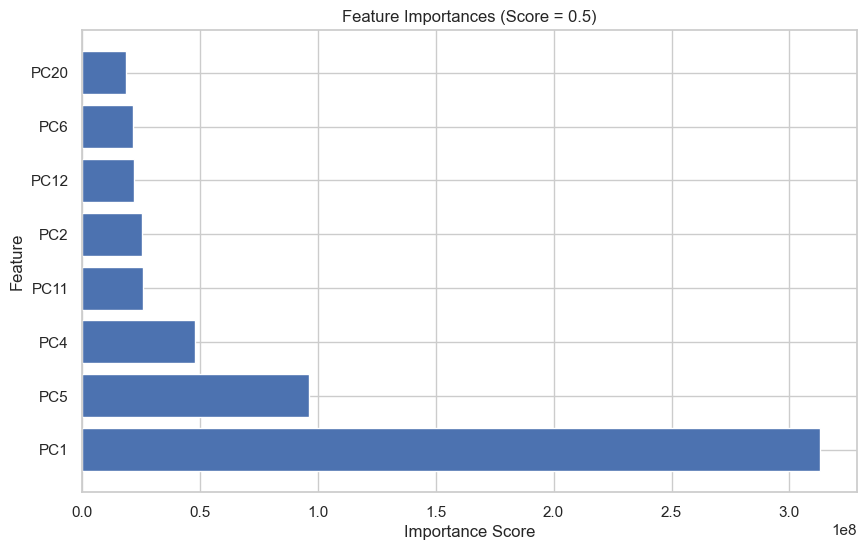

In [127]:
# Filter the feature importances based on importance score
importance_score = 0.05
filtered_importances = [(feat, value, score, _) for feat, value, score, _ in feature_importances if score >= importance_score]

# Extract the feature names and importance scores
feature_names = [row[0] for row in filtered_importances]
importance_scores = [row[1] for row in filtered_importances]

# Create a bar plot of filtered feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importances (Score = 0.5)')
plt.show()

In [92]:
print("Feature Importances:", feature_importances)

Feature Importances: None


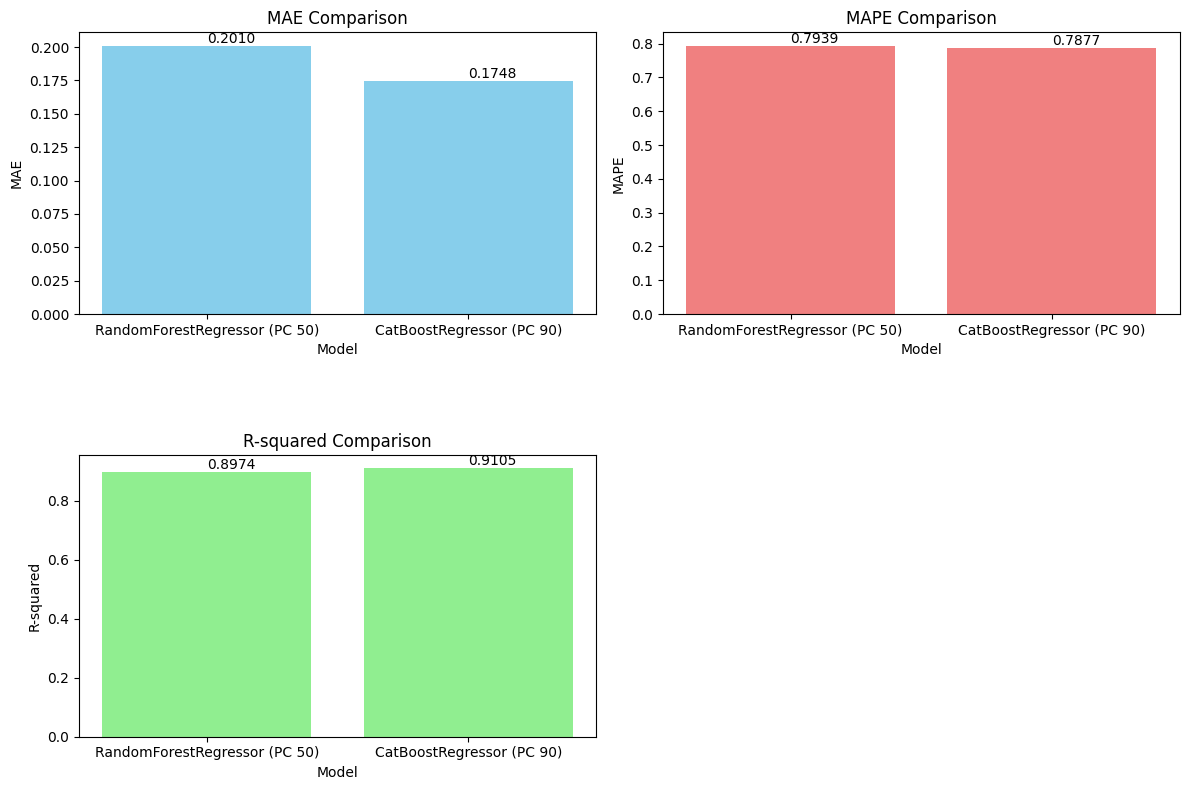

In [3]:
data = {
    'Model': ['RandomForestRegressor (PC 50)', 'CatBoostRegressor (PC 90)'],
    'MAE': [0.2010, 0.1748],
    'MAPE': [0.7939, 0.7877],
    'R-squared': [0.8974, 0.9105]
}

df = pd.DataFrame(data)

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# MAE Comparison
axes[0, 0].bar(df['Model'], df['MAE'], color='skyblue')
axes[0, 0].set_xlabel('Model')
axes[0, 0].set_ylabel('MAE')
axes[0, 0].set_title('MAE Comparison')
for i, val in enumerate(df['MAE']):
    axes[0, 0].text(i, val, f'{val:.4f}', va='bottom', fontsize=10)

# MAPE Comparison
axes[0, 1].bar(df['Model'], df['MAPE'], color='lightcoral')
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('MAPE')
axes[0, 1].set_title('MAPE Comparison')
for i, val in enumerate(df['MAPE']):
    axes[0, 1].text(i, val, f'{val:.4f}', va='bottom', fontsize=10)

# R-squared Comparison
axes[1, 0].bar(df['Model'], df['R-squared'], color='lightgreen')
axes[1, 0].set_xlabel('Model')
axes[1, 0].set_ylabel('R-squared')
axes[1, 0].set_title('R-squared Comparison')
for i, val in enumerate(df['R-squared']):
    axes[1, 0].text(i, val, f'{val:.4f}', va='bottom', fontsize=10)

# Remove the empty subplot
fig.delaxes(axes[1, 1])

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

plt.show()

In [2]:
df

,Model,MAE,MAPE,R-squared
0,RandomForestRegressor (PC 50),0.2010,0.7939,0.8974
1,CatBoostRegressor (PC 90),0.1748,0.7877,0.9105
